In [4]:
import pandas as pd

#Load the dataset
df = pd.read_csv('/content/studentInfo.csv')

#show the first 5 rows of the dataset
df.head()

#Overview od dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              32593 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [5]:
#check for missing values
df.isnull().sum()

,0
code_module,0
code_presentation,0
id_student,0
gender,0
region,0
highest_education,0
imd_band,0
age_band,0
num_of_prev_attempts,0
studied_credits,0


In [6]:
#Check values counts of the target column
df['final_result'].value_counts()


,count
final_result,
Pass,12361
Withdrawn,10156
Fail,7052
Distinction,3024


In [7]:
# Map final_result to numeric labels
df['final_result_encoded'] = df['final_result'].map({
    'Fail': 0,
    'Withdrawn': 1,
    'Pass': 2,
    'Distinction': 3
})

# Check to confirm
df[['final_result', 'final_result_encoded']].head()

,final_result,final_result_encoded
0,Pass,2
1,Pass,2
2,Withdrawn,1
3,Pass,2
4,Pass,2


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

/tmp/ipython-input-10-2761823220.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='final_result', order=df['final_result'].value_counts().index, palette='Set2')


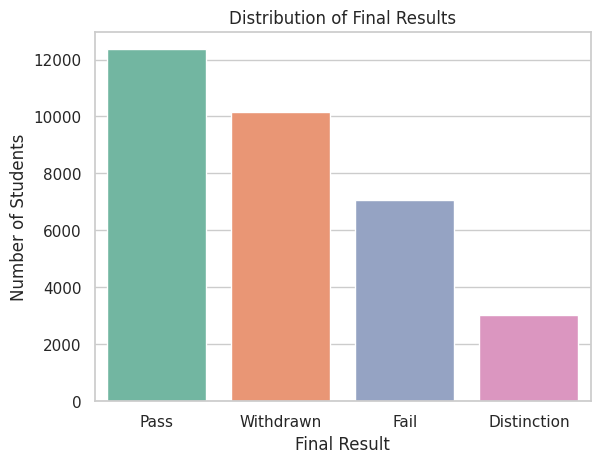

In [10]:
sns.countplot(data=df, x='final_result', order=df['final_result'].value_counts().index, palette='Set2')
plt.title('Distribution of Final Results')
plt.xlabel('Final Result')
plt.ylabel('Number of Students')
plt.show()

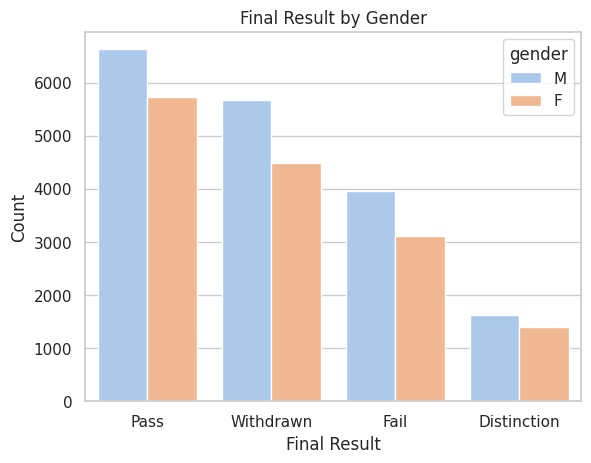

In [11]:
sns.countplot(data=df, x='final_result', hue='gender', palette='pastel')
plt.title('Final Result by Gender')
plt.xlabel('Final Result')
plt.ylabel('Count')
plt.show()

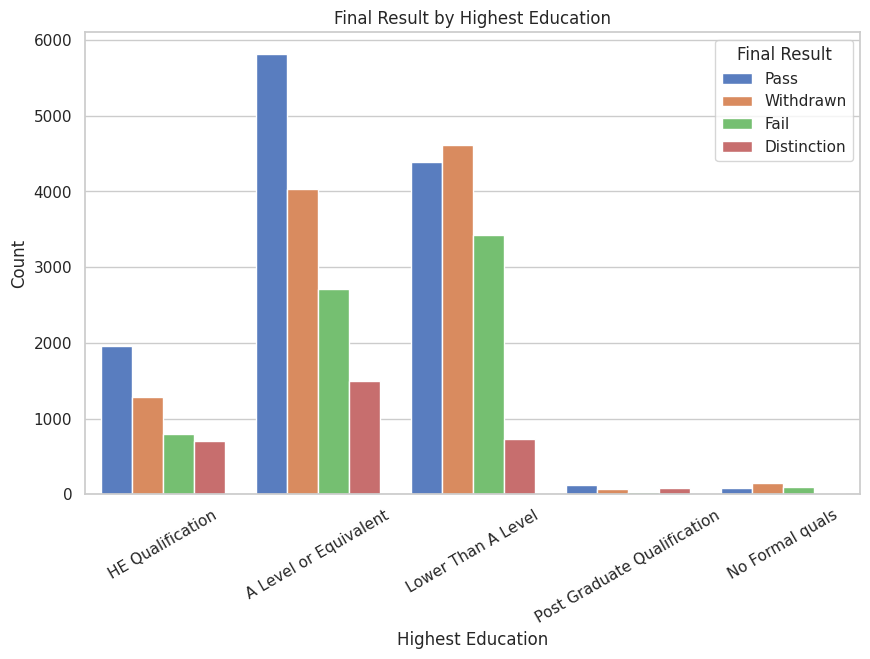

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='highest_education', hue='final_result', palette='muted')
plt.title('Final Result by Highest Education')
plt.xlabel('Highest Education')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Final Result')
plt.show()


In [14]:
# Drop columns that shouldn't be used as input features
X = df.drop(['final_result', 'final_result_encoded', 'id_student'], axis=1)

# Use the encoded final result as target
y = df['final_result_encoded']

In [15]:
# Convert categorical columns to dummy/one-hot encoding
X = pd.get_dummies(X, drop_first=True)

In [18]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test set
y_pred = model.predict(X_test)

# Show performance metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 307  500  617   71]
 [ 323  837  744   69]
 [ 395  656 1264  143]
 [  76  151  315   51]]
              precision    recall  f1-score   support

           0       0.28      0.21      0.24      1495
           1       0.39      0.42      0.41      1973
           2       0.43      0.51      0.47      2458
           3       0.15      0.09      0.11       593

    accuracy                           0.38      6519
   macro avg       0.31      0.31      0.31      6519
weighted avg       0.36      0.38      0.36      6519

